In [2]:
# Tell Jupyter to plot figure right in the page
# Module with plot capabilities
import matplotlib.pyplot as plt
import seaborn as sns
import hyperspy.api as hs

# Module with scientific computing functions (matrix/vector)
import numpy as np                

# Modules with reading/write folder/file functions
import os
from pathlib import Path
import SimpleITK as sitk

# module to deal with images
import uproot

# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path()

# Display the content of a folder
output_folder = Path('./output')
if not output_folder.is_dir():
    print('ERROR: {} is not a folder.'.format(output_folder))
else:
    print('The folder and contains the following files:'.format(output_folder))
    p = output_folder.glob('**/*')
    files = [x for x in p if x.is_file()]
    for x in files:
        print(x)

The Current Working Directory (CWD) is: 
 /workspace/gate/VHEE_monitor
The folder and contains the following files:
output/stats.txt
output/doselat_edep.raw
output/dose3d_dose_uncertainty.mhd
output/dose3d_dose_uncertainty.raw
output/dose3d_dose.mhd
output/dose3d_edep.raw
output/doselat_edep.mhd
output/dose3d_dose.raw
output/doselat_edep_uncertainty.raw
output/doselat_edep_uncertainty.mhd
output/dose3d_edep.mhd
output/spect.root


In [3]:
f = uproot.open('output/spect.root')
print("List of tree : \n", f.keys())
hits = f['Hits_crystal']
print('Number of hits:', hits.num_entries)
print('Hits keys: ')
for i in hits.keys():
    print(i, ' ', end='')

List of tree : 
 ['Hits_crystal;1']
Number of hits: 1142788.0
Hits keys: 
PostPosition_X  PostPosition_Y  PostPosition_Z  PreKineticEnergy  TotalEnergyDeposit  

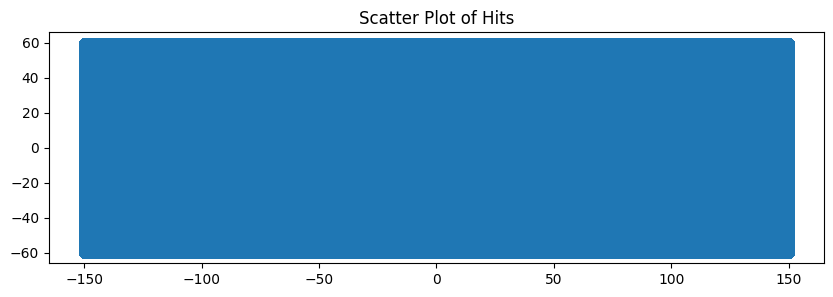

In [5]:
hits_y = np.array(hits.arrays()['PostPosition_Y'])
hits_z = np.array(hits.arrays()['PostPosition_Z'])
hits_x = np.array(hits.arrays()['PostPosition_X'])
preKinEnergy = np.array(hits.arrays()['PreKineticEnergy'])  

preKinEnergy_enwin = np.logical_and(preKinEnergy > 0, preKinEnergy < 2)

hits_y_enwin = hits_y[preKinEnergy_enwin]
hits_z_enwin = hits_z[preKinEnergy_enwin]
plt.figure(figsize=(10, 3))

plt.scatter(x=hits_z, y=hits_y)

plt.title('Scatter Plot of Hits')
plt.show()




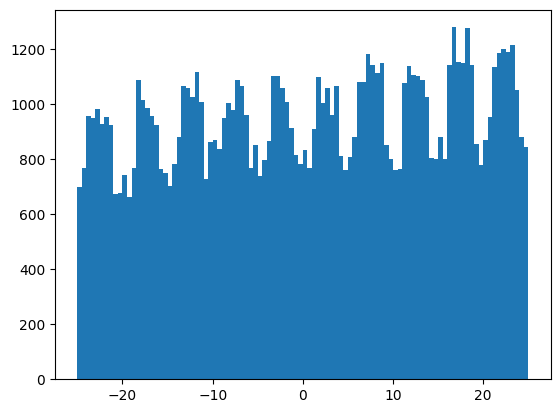

In [12]:
plt.hist(hits_z, bins=100, range=(-25, 25))
plt.show()

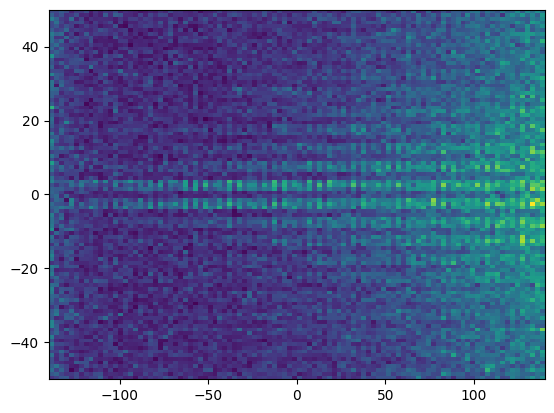

In [26]:
plt.hist2d(hits_z, hits_y, bins=100, range=[[-140, 140], [-50, 50]])
plt.show()

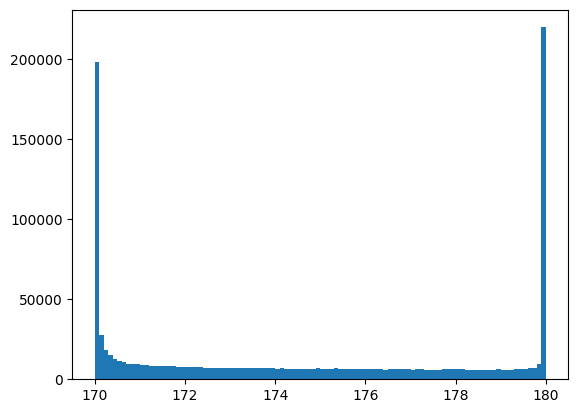

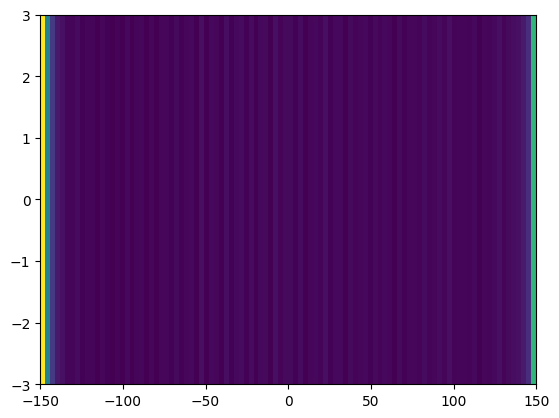

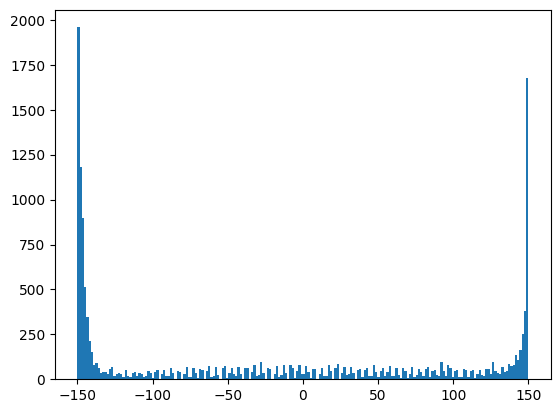

In [ ]:

z = np.linspace(-150, 150, 1000)
hist, xedges, yedges = np.histogram2d(hits_z[hits_x<170.5], hits_y[hits_x<170.5], bins=(1000, 1), range=[[-150, 150], [-3, 3]])
hist = np.reshape(hist, (1000))

plt.hist2d(hits_z[hits_x<170.5], hits_y[hits_x<170.5], bins=(100, 1), range=[[-150, 150], [-3, 3]])
plt.show()

plt.hist(z, weights=hist, bins=200)
plt.show()
